In [1]:
import pandas as pd

In [2]:
from numpy import nan, isnan, array, argsort

In [3]:
import matplotlib.pyplot as plt

In [4]:
cities = array(['ahmedabad', 'bengaluru', 'chandigarh', 'chennai', 'coimbatore', 'dehradun','delhi', 'gangtok', 'guwahati', 'kochi', 'mumbai', 'rishikesh', 'shillong', 'thiruvananthapuram', 'hyderabad', 'pune', 'noida', 'gurugram'])

In [5]:
dfs= {}

In [6]:
df1 = pd.read_excel('./aqi_data/AQI_daily_city_level_mumbai_2023_mumbai_2023.xlsx')

In [7]:
df1

,,Unnamed: 1,Central Pollution Control Board,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,Air Quality Calendar Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,State : Maharashtra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,City : Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Year : 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Day,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
7,1,147,227,174,108,74,89,67,54,84,87,175,127
8,2,188,180,205,93,78,84,54,58,81,97,169,138
9,3,214,198,262,86,80,74,62,62,80,116,178,144


In [8]:
chalega_kuchhbhi = True

In [9]:
indicator_col = df1[' ']
if chalega_kuchhbhi:
    df1 = df1.loc[(indicator_col == 'Good') | (indicator_col == 'Satisfactory') | (indicator_col == 'Satifactory')]
else:
    df1 = df1.loc[(indicator_col == 'Good')]

In [10]:
df1

,,Unnamed: 1,Central Pollution Control Board,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
39,Good,,,,,,,3,2,,,,
40,Satifactory,,,10,16,28,30,27,29,30,4,6,


In [11]:
df1.apply(pd.to_numeric, errors='coerce').sum().sum()

np.float64(185.0)

In [12]:
def get_good_days_percent_2023(df1, chalega_kuchhbhi = False):
    indicator_col = df1[' ']    
    if chalega_kuchhbhi:
        df1 = df1.loc[(indicator_col == 'Good') | (indicator_col == 'Satisfactory') | (indicator_col == 'Satifactory')]
    else:
        df1 = df1.loc[(indicator_col == 'Good')]
    return df1.apply(pd.to_numeric, errors='coerce').sum().sum() / 365

In [13]:
df2 = pd.read_excel('./aqi_data/AQI_daily_city_level_mumbai_2024_mumbai_2024.xlsx')
df2

,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,132.0,93.0,118.0,106.0,102.0,62.0,60.0,41.0,39.0,66.0,169.0,167.0
1,2,133.0,63.0,71.0,160.0,92.0,50.0,54.0,32.0,45.0,101.0,208.0,174.0
2,3,117.0,122.0,55.0,128.0,117.0,68.0,61.0,31.0,43.0,58.0,157.0,129.0
3,4,129.0,158.0,72.0,89.0,89.0,82.0,59.0,36.0,46.0,54.0,159.0,139.0
4,5,123.0,154.0,109.0,91.0,79.0,69.0,51.0,37.0,36.0,54.0,150.0,154.0
5,6,128.0,127.0,119.0,131.0,68.0,59.0,56.0,35.0,40.0,61.0,158.0,148.0
6,7,124.0,115.0,108.0,95.0,65.0,62.0,74.0,34.0,37.0,116.0,137.0,126.0
7,8,97.0,131.0,124.0,74.0,77.0,57.0,47.0,38.0,34.0,115.0,146.0,125.0
8,9,115.0,127.0,122.0,93.0,70.0,56.0,36.0,39.0,37.0,84.0,144.0,112.0
9,10,82.0,120.0,113.0,88.0,67.0,48.0,42.0,37.0,31.0,59.0,141.0,131.0


In [14]:
df2= df2.drop(columns=['Day'], errors="ignore")
df2= df2[:31]
df2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,132.0,93.0,118.0,106.0,102.0,62.0,60.0,41.0,39.0,66.0,169.0,167.0
1,133.0,63.0,71.0,160.0,92.0,50.0,54.0,32.0,45.0,101.0,208.0,174.0
2,117.0,122.0,55.0,128.0,117.0,68.0,61.0,31.0,43.0,58.0,157.0,129.0
3,129.0,158.0,72.0,89.0,89.0,82.0,59.0,36.0,46.0,54.0,159.0,139.0
4,123.0,154.0,109.0,91.0,79.0,69.0,51.0,37.0,36.0,54.0,150.0,154.0
5,128.0,127.0,119.0,131.0,68.0,59.0,56.0,35.0,40.0,61.0,158.0,148.0
6,124.0,115.0,108.0,95.0,65.0,62.0,74.0,34.0,37.0,116.0,137.0,126.0
7,97.0,131.0,124.0,74.0,77.0,57.0,47.0,38.0,34.0,115.0,146.0,125.0
8,115.0,127.0,122.0,93.0,70.0,56.0,36.0,39.0,37.0,84.0,144.0,112.0
9,82.0,120.0,113.0,88.0,67.0,48.0,42.0,37.0,31.0,59.0,141.0,131.0


In [15]:
df3 = pd.read_excel('./aqi_data/AQI_daily_city_level_guwahati_2017_guwahati_2017.xlsx')

In [16]:
df3= df3.drop(columns=['Date'], errors="ignore")

In [17]:
df3

,January,February,March,April,May,June,July,August,September,October,November,December
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# sometimes, the sheet is empty
(isnan(df3)).sum().sum()

np.int64(372)

In [19]:
thresh = 100 if chalega_kuchhbhi else 50
(df3 < thresh).sum().sum() 

np.int64(0)

In [20]:
def get_good_days_percent_oldsheet(df2, chalega_kuchhbhi = False, null_days_limit_per_year= 150):
    df2= df2.drop(columns=['Date', 'Day'], errors="ignore")
    
    # cleaning the good, etc. labels which have inconsistent govt definitions anyway
    df2= df2[:31]
    if (isnan(df2)).sum().sum() > null_days_limit_per_year:
        # data is bad if there are too many blank readings
        return nan
    thresh = 100 if chalega_kuchhbhi else 50
    return (df2 < thresh).sum().sum() / 365

In [21]:
def find_score(chalega_kuchhbhi= True):
    res_data= {}
    for city in cities:
        for year in range(2018, 2025):
            try:
                df= pd.read_excel(f'./aqi_data/AQI_daily_city_level_{city}_{year}_{city}_{year}.xlsx')
                print("opened: ", city, year)
                
                if year == 2023:
                    score= get_good_days_percent_2023(df, chalega_kuchhbhi= chalega_kuchhbhi)
                    res_data[f'{city}-{year}'] = score
                    print("score: ", score)
                else:
                    score= get_good_days_percent_oldsheet(df, chalega_kuchhbhi= chalega_kuchhbhi)
                    res_data[f'{city}-{year}'] = score
                    print("score: ", score)
            except OSError as e:
                print('no bueano', e, city, year)
    return res_data

In [22]:
res_data= find_score(chalega_kuchhbhi= True)

opened:  ahmedabad 2018
score:  0.23013698630136986
no bueano [Errno 2] No such file or directory: './aqi_data/AQI_daily_city_level_ahmedabad_2019_ahmedabad_2019.xlsx' ahmedabad 2019
opened:  ahmedabad 2020
score:  0.4383561643835616
opened:  ahmedabad 2021
score:  0.4273972602739726
opened:  ahmedabad 2022
score:  0.4246575342465753
opened:  ahmedabad 2023
score:  0.4410958904109589
opened:  ahmedabad 2024
score:  0.34794520547945207
opened:  bengaluru 2018
score:  0.8082191780821918
no bueano [Errno 2] No such file or directory: './aqi_data/AQI_daily_city_level_bengaluru_2019_bengaluru_2019.xlsx' bengaluru 2019
opened:  bengaluru 2020
score:  0.9041095890410958
opened:  bengaluru 2021
score:  0.8794520547945206
opened:  bengaluru 2022
score:  0.8082191780821918
opened:  bengaluru 2023
score:  0.8986301369863013
opened:  bengaluru 2024
score:  0.8657534246575342
opened:  chandigarh 2018
score:  nan
no bueano [Errno 2] No such file or directory: './aqi_data/AQI_daily_city_level_chandig

In [23]:
def plot_aqi(year_analysis, cities, res_data, chalega_kuchhbhi= True):
    score= array([res_data.get(f'{city}-{year_analysis}', nan) for city in cities])
    print(score)
    mask = ~isnan(score)
    score= score[mask]
    cities_available= cities[mask]
    print(score)
    sorted_indices = argsort(score)[::-1]
    score= score[sorted_indices]
    cities_available= cities_available[sorted_indices]
    print(score)
    plt.figure(figsize=(18, 6))
    plt.bar(cities_available, score)
    plt.xticks(rotation=30)
    plt.title(f'AQI % {"Satisfactory" if chalega_kuchhbhi else "Good"}, {year_analysis}')
    plt.xlabel('Cities')
    plt.ylabel('Score')
    plt.show()

[0.23013699 0.80821918        nan 0.56712329        nan        nan
 0.14520548        nan        nan        nan 0.38082192        nan
        nan 0.75616438 0.52328767 0.59452055 0.13150685 0.10684932]
[0.23013699 0.80821918 0.56712329 0.14520548 0.38082192 0.75616438
 0.52328767 0.59452055 0.13150685 0.10684932]
[0.80821918 0.75616438 0.59452055 0.56712329 0.52328767 0.38082192
 0.23013699 0.14520548 0.13150685 0.10684932]


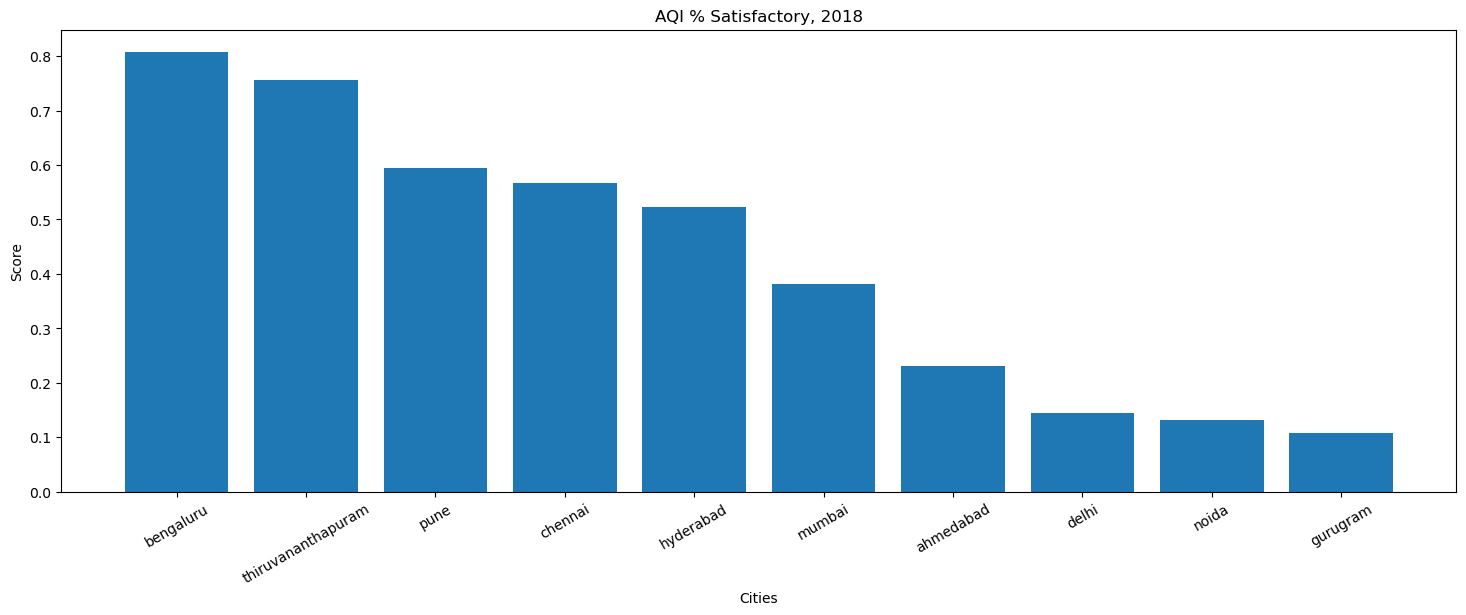

[0.43835616 0.90410959 0.73150685 0.91232877 0.6109589         nan
 0.2630137         nan 0.54246575 0.5890411  0.60547945        nan
 0.66027397 0.97534247 0.74246575 0.6        0.28767123 0.26027397]
[0.43835616 0.90410959 0.73150685 0.91232877 0.6109589  0.2630137
 0.54246575 0.5890411  0.60547945 0.66027397 0.97534247 0.74246575
 0.6        0.28767123 0.26027397]
[0.97534247 0.91232877 0.90410959 0.74246575 0.73150685 0.66027397
 0.6109589  0.60547945 0.6        0.5890411  0.54246575 0.43835616
 0.28767123 0.2630137  0.26027397]


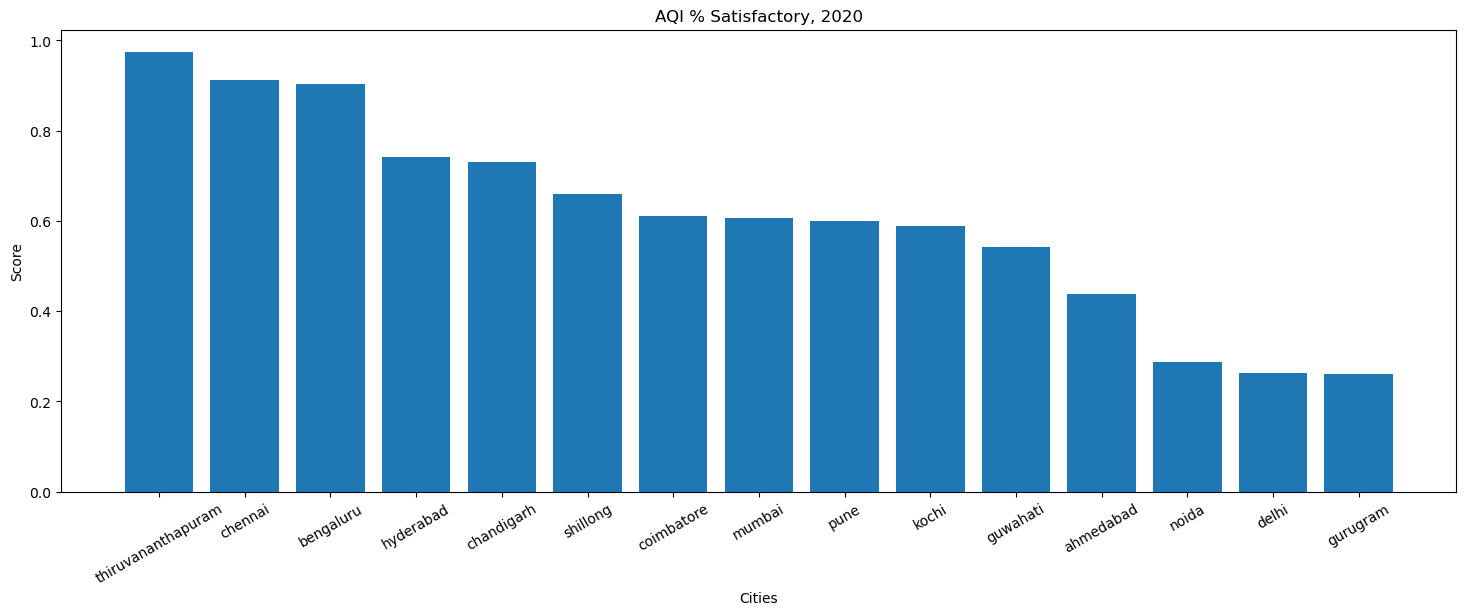

[0.42739726 0.87945205 0.48219178 0.92876712        nan        nan
 0.19726027        nan 0.50958904 0.63287671 0.54520548        nan
        nan 0.9369863  0.57534247 0.64383562 0.19726027 0.26027397]
[0.42739726 0.87945205 0.48219178 0.92876712 0.19726027 0.50958904
 0.63287671 0.54520548 0.9369863  0.57534247 0.64383562 0.19726027
 0.26027397]
[0.9369863  0.92876712 0.87945205 0.64383562 0.63287671 0.57534247
 0.54520548 0.50958904 0.48219178 0.42739726 0.26027397 0.19726027
 0.19726027]


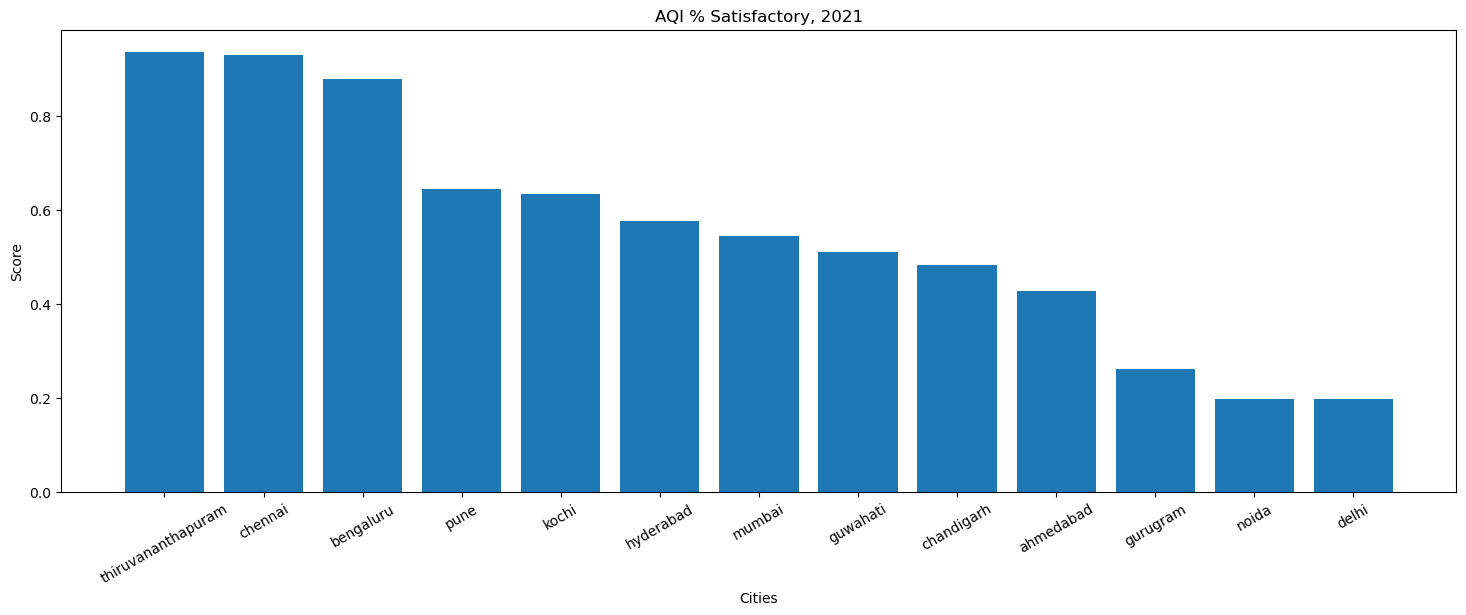

[0.42465753 0.80821918 0.3369863  0.88219178 0.6739726         nan
        nan        nan 0.6109589  0.44383562 0.4739726         nan
 0.85753425 0.96986301 0.62739726        nan 0.2109589  0.14246575]
[0.42465753 0.80821918 0.3369863  0.88219178 0.6739726  0.6109589
 0.44383562 0.4739726  0.85753425 0.96986301 0.62739726 0.2109589
 0.14246575]
[0.96986301 0.88219178 0.85753425 0.80821918 0.6739726  0.62739726
 0.6109589  0.4739726  0.44383562 0.42465753 0.3369863  0.2109589
 0.14246575]


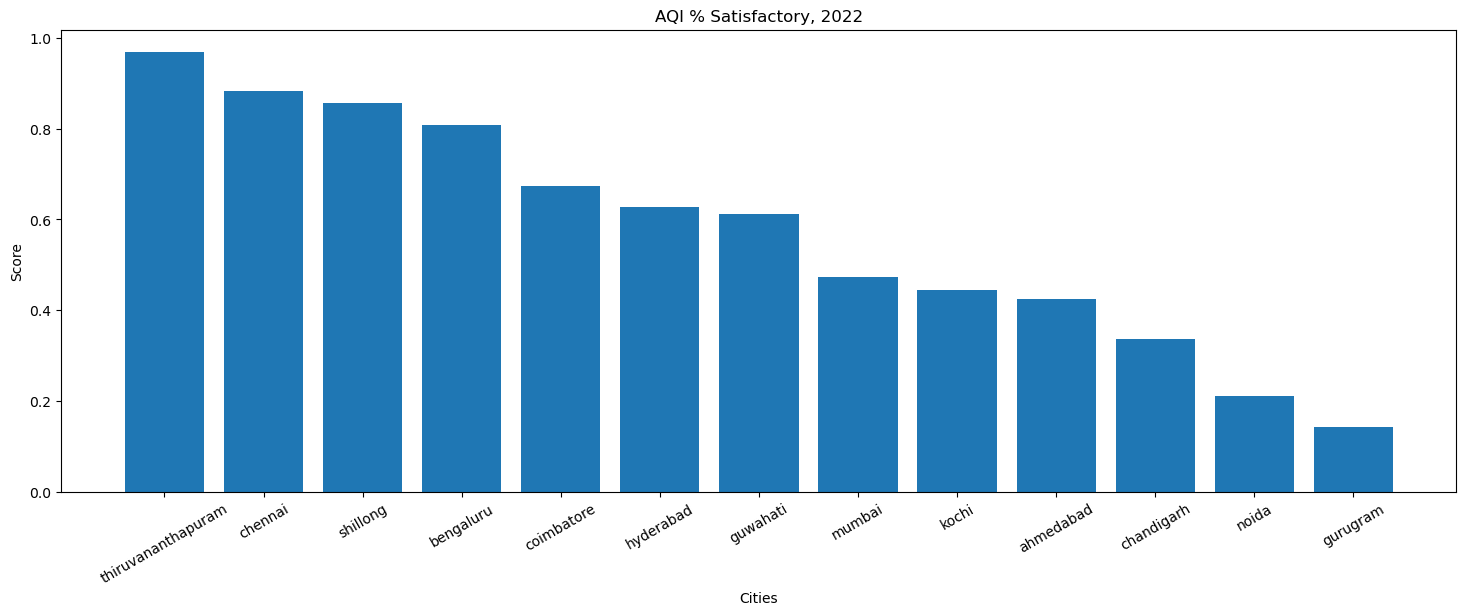

[0.44109589 0.89863014 0.34520548 0.84383562 0.23013699 0.54520548
 0.16712329 0.84383562 0.48767123 0.56986301 0.50684932 0.8
 0.76164384 0.95342466 0.7890411  0.32876712 0.18356164 0.13424658]
[0.44109589 0.89863014 0.34520548 0.84383562 0.23013699 0.54520548
 0.16712329 0.84383562 0.48767123 0.56986301 0.50684932 0.8
 0.76164384 0.95342466 0.7890411  0.32876712 0.18356164 0.13424658]
[0.95342466 0.89863014 0.84383562 0.84383562 0.8        0.7890411
 0.76164384 0.56986301 0.54520548 0.50684932 0.48767123 0.44109589
 0.34520548 0.32876712 0.23013699 0.18356164 0.16712329 0.13424658]


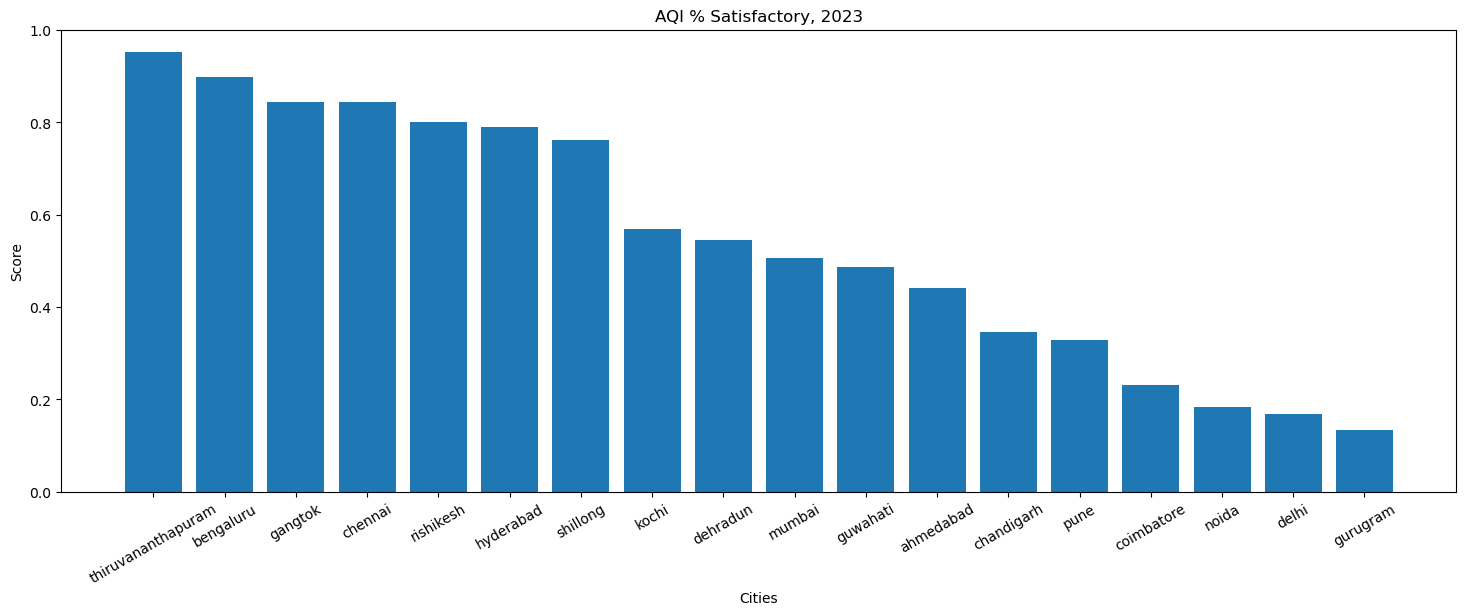

[0.34794521 0.86575342 0.29863014 0.89041096 0.69589041 0.54794521
 0.17534247 0.74246575 0.57260274        nan 0.5890411  0.75068493
        nan 0.99178082 0.84931507 0.50958904 0.22465753 0.15890411]
[0.34794521 0.86575342 0.29863014 0.89041096 0.69589041 0.54794521
 0.17534247 0.74246575 0.57260274 0.5890411  0.75068493 0.99178082
 0.84931507 0.50958904 0.22465753 0.15890411]
[0.99178082 0.89041096 0.86575342 0.84931507 0.75068493 0.74246575
 0.69589041 0.5890411  0.57260274 0.54794521 0.50958904 0.34794521
 0.29863014 0.22465753 0.17534247 0.15890411]


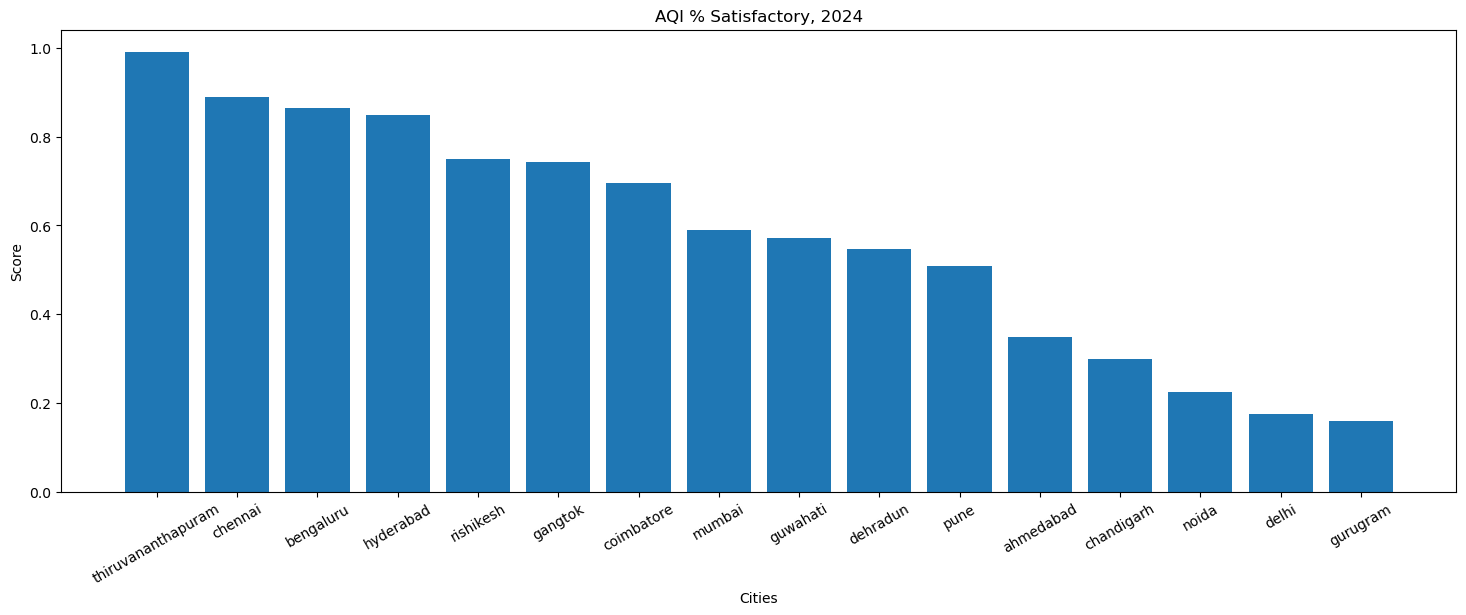

In [24]:
plot_aqi(2018, cities, res_data)
plot_aqi(2020, cities, res_data)
plot_aqi(2021, cities, res_data)
plot_aqi(2022, cities, res_data)
plot_aqi(2023, cities, res_data)
plot_aqi(2024, cities, res_data)

opened:  ahmedabad 2018
score:  0.0
no bueano [Errno 2] No such file or directory: './aqi_data/AQI_daily_city_level_ahmedabad_2019_ahmedabad_2019.xlsx' ahmedabad 2019
opened:  ahmedabad 2020
score:  0.0136986301369863
opened:  ahmedabad 2021
score:  0.00821917808219178
opened:  ahmedabad 2022
score:  0.0273972602739726
opened:  ahmedabad 2023
score:  0.00821917808219178
opened:  ahmedabad 2024
score:  0.030136986301369864
opened:  bengaluru 2018
score:  0.07123287671232877
no bueano [Errno 2] No such file or directory: './aqi_data/AQI_daily_city_level_bengaluru_2019_bengaluru_2019.xlsx' bengaluru 2019
opened:  bengaluru 2020
score:  0.29041095890410956
opened:  bengaluru 2021
score:  0.1863013698630137
opened:  bengaluru 2022
score:  0.08767123287671233
opened:  bengaluru 2023
score:  0.18904109589041096
opened:  bengaluru 2024
score:  0.136986301369863
opened:  chandigarh 2018
score:  nan
no bueano [Errno 2] No such file or directory: './aqi_data/AQI_daily_city_level_chandigarh_2019_c

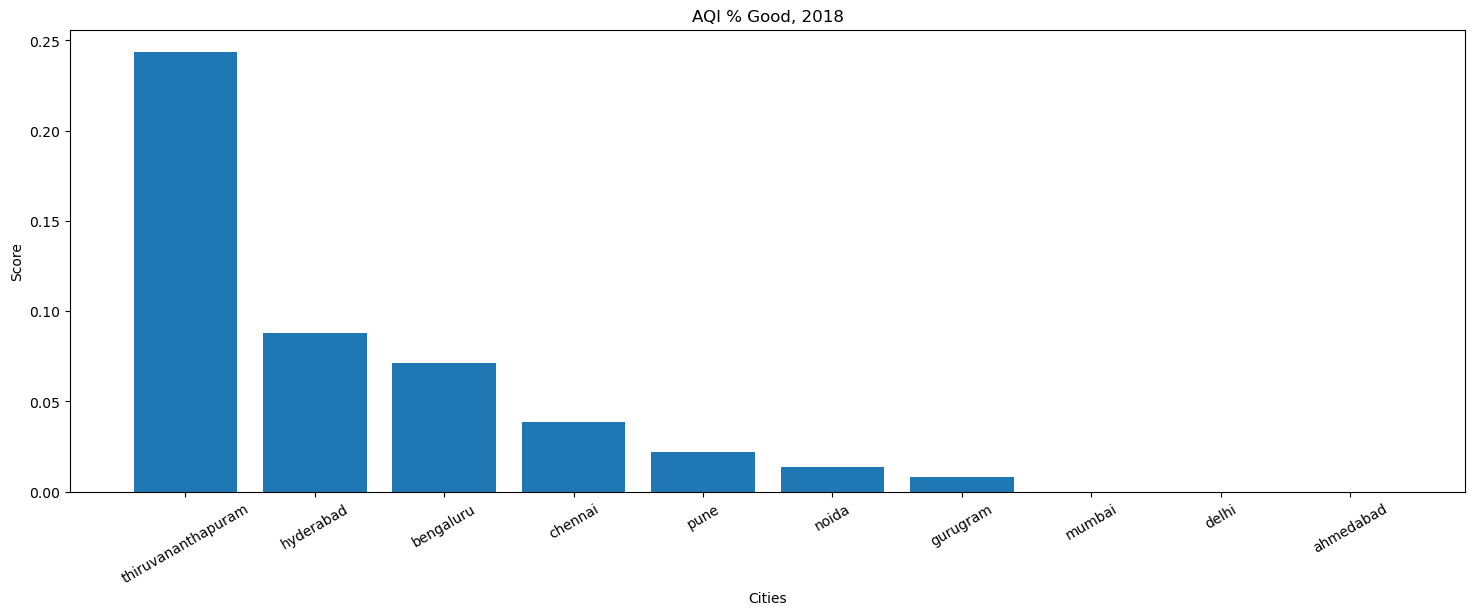

[0.01369863 0.29041096 0.32054795 0.13972603 0.26849315        nan
 0.00821918        nan 0.37534247 0.07945205 0.31232877        nan
 0.52328767 0.41643836 0.29315068 0.12328767 0.01369863 0.02465753]
[0.01369863 0.29041096 0.32054795 0.13972603 0.26849315 0.00821918
 0.37534247 0.07945205 0.31232877 0.52328767 0.41643836 0.29315068
 0.12328767 0.01369863 0.02465753]
[0.52328767 0.41643836 0.37534247 0.32054795 0.31232877 0.29315068
 0.29041096 0.26849315 0.13972603 0.12328767 0.07945205 0.02465753
 0.01369863 0.01369863 0.00821918]


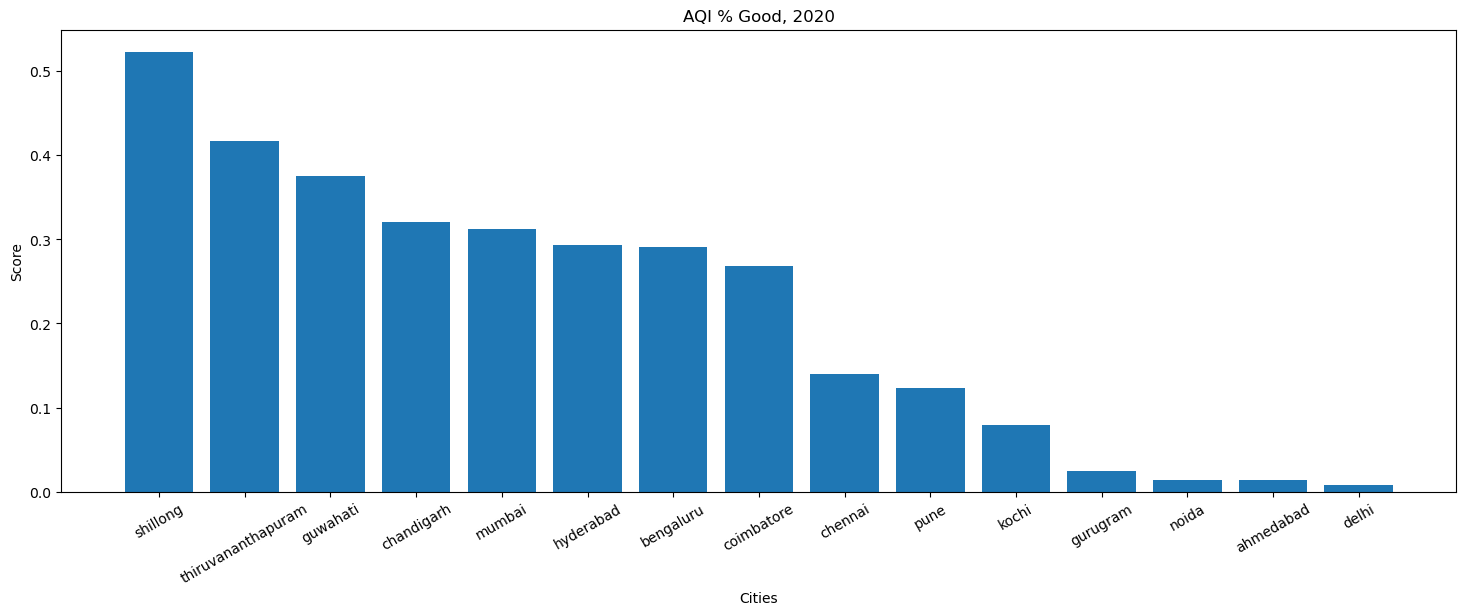

[0.00821918 0.18630137 0.12876712 0.18356164        nan        nan
 0.00273973        nan 0.20821918 0.37534247 0.09041096        nan
        nan 0.44657534 0.28493151 0.00547945 0.00821918 0.01643836]
[0.00821918 0.18630137 0.12876712 0.18356164 0.00273973 0.20821918
 0.37534247 0.09041096 0.44657534 0.28493151 0.00547945 0.00821918
 0.01643836]
[0.44657534 0.37534247 0.28493151 0.20821918 0.18630137 0.18356164
 0.12876712 0.09041096 0.01643836 0.00821918 0.00821918 0.00547945
 0.00273973]


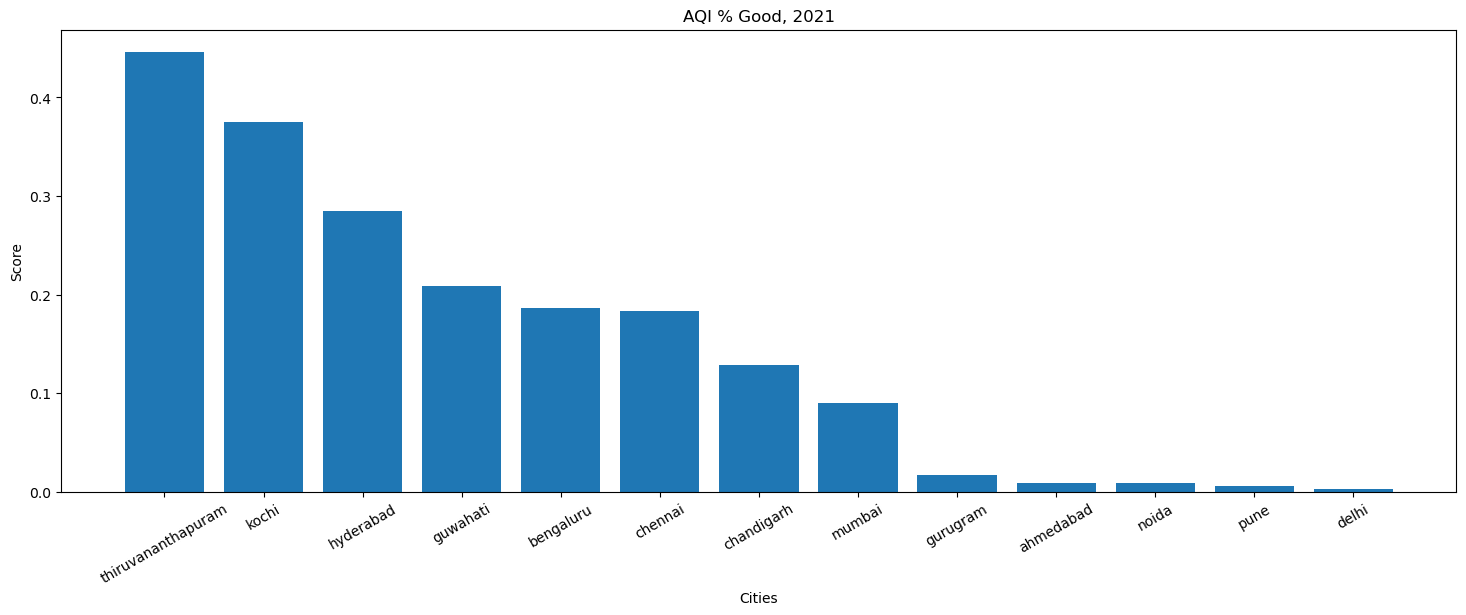

[0.02739726 0.08767123 0.08219178 0.16712329 0.33972603        nan
        nan        nan 0.23287671 0.07671233 0.04657534        nan
 0.69041096 0.51232877 0.12328767        nan 0.01643836 0.02465753]
[0.02739726 0.08767123 0.08219178 0.16712329 0.33972603 0.23287671
 0.07671233 0.04657534 0.69041096 0.51232877 0.12328767 0.01643836
 0.02465753]
[0.69041096 0.51232877 0.33972603 0.23287671 0.16712329 0.12328767
 0.08767123 0.08219178 0.07671233 0.04657534 0.02739726 0.02465753
 0.01643836]


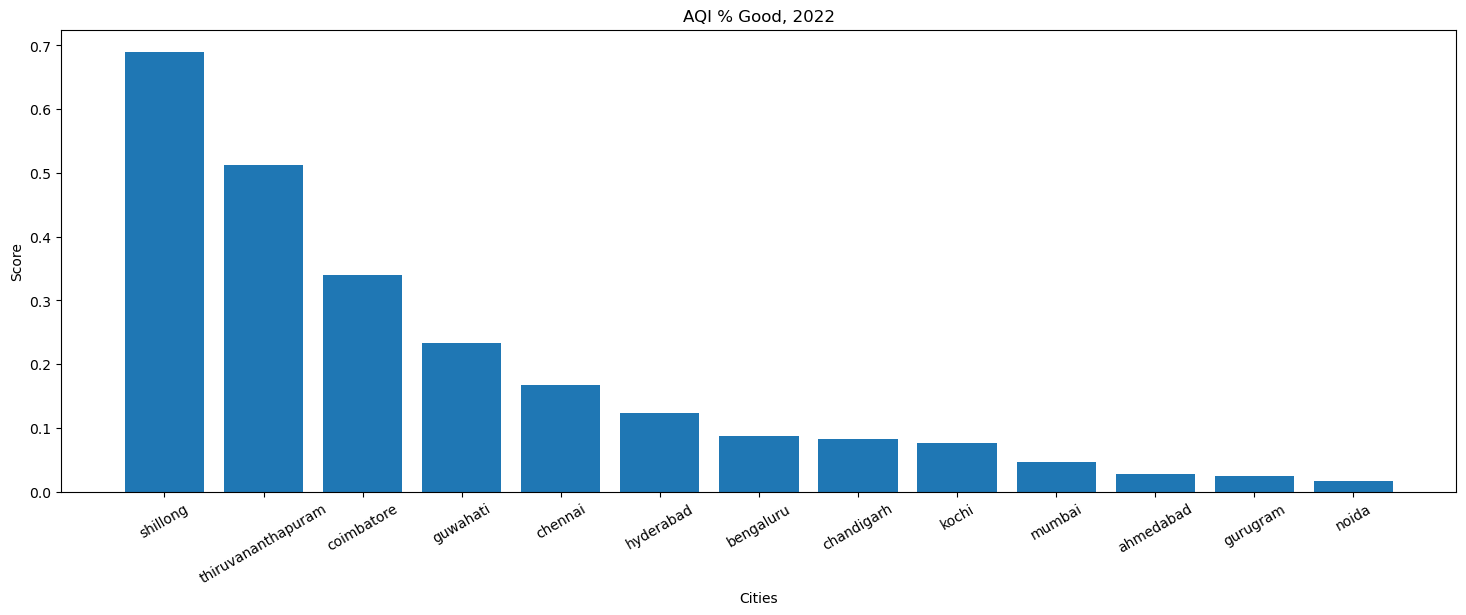

[0.00821918 0.1890411  0.03561644 0.08767123 0.02739726 0.05753425
 0.00273973 0.20821918 0.10684932 0.03013699 0.01369863 0.43835616
 0.44109589 0.6630137  0.01369863 0.00273973 0.0109589  0.        ]
[0.00821918 0.1890411  0.03561644 0.08767123 0.02739726 0.05753425
 0.00273973 0.20821918 0.10684932 0.03013699 0.01369863 0.43835616
 0.44109589 0.6630137  0.01369863 0.00273973 0.0109589  0.        ]
[0.6630137  0.44109589 0.43835616 0.20821918 0.1890411  0.10684932
 0.08767123 0.05753425 0.03561644 0.03013699 0.02739726 0.01369863
 0.01369863 0.0109589  0.00821918 0.00273973 0.00273973 0.        ]


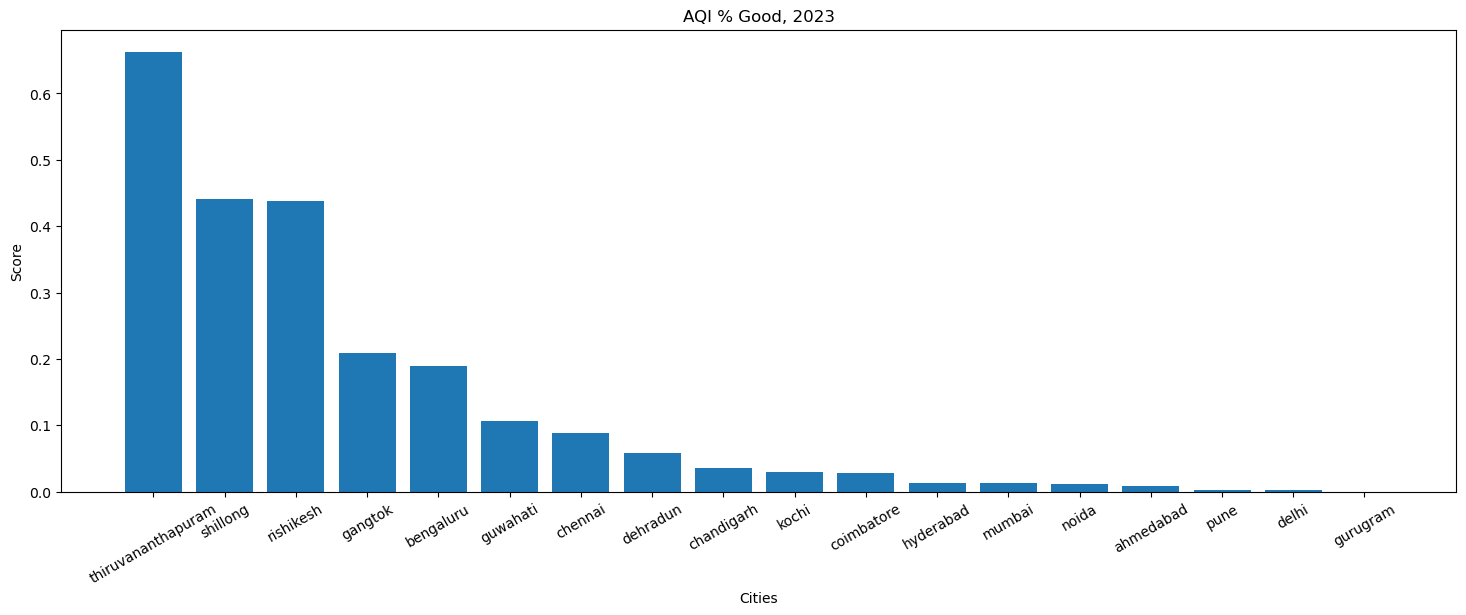

[0.03013699 0.1369863  0.05205479 0.1260274  0.31232877 0.22191781
 0.         0.41917808 0.15616438        nan 0.21369863 0.24657534
        nan 0.40547945 0.07123288 0.12876712 0.02739726 0.00273973]
[0.03013699 0.1369863  0.05205479 0.1260274  0.31232877 0.22191781
 0.         0.41917808 0.15616438 0.21369863 0.24657534 0.40547945
 0.07123288 0.12876712 0.02739726 0.00273973]
[0.41917808 0.40547945 0.31232877 0.24657534 0.22191781 0.21369863
 0.15616438 0.1369863  0.12876712 0.1260274  0.07123288 0.05205479
 0.03013699 0.02739726 0.00273973 0.        ]


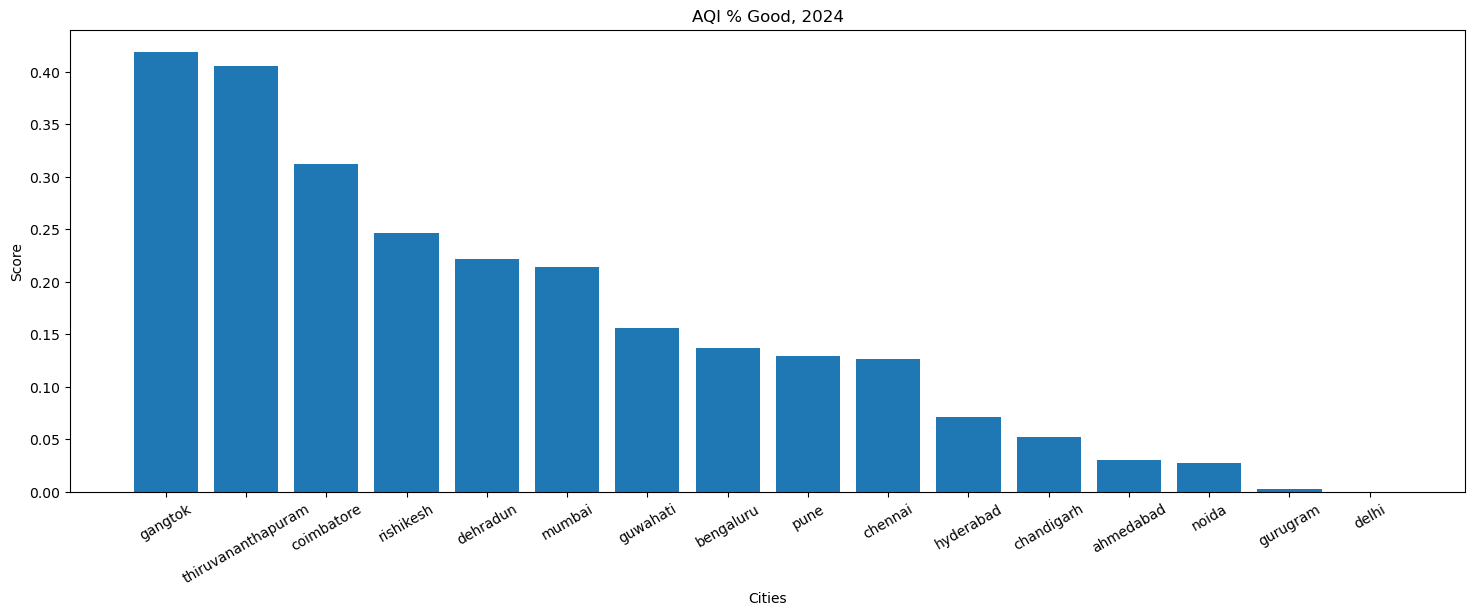

In [25]:
res_data= find_score(chalega_kuchhbhi= False)
plot_aqi(2018, cities, res_data, chalega_kuchhbhi= False)
plot_aqi(2020, cities, res_data, chalega_kuchhbhi= False)
plot_aqi(2021, cities, res_data, chalega_kuchhbhi= False)
plot_aqi(2022, cities, res_data, chalega_kuchhbhi= False)
plot_aqi(2023, cities, res_data, chalega_kuchhbhi= False)
plot_aqi(2024, cities, res_data, chalega_kuchhbhi= False)